# PYTORCH FIRST NN EXAMPLE

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
iris_data = load_iris()

In [3]:
X,Y = iris_data.data, iris_data.target

In [4]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
Y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
labels = []
for num in range(len(Y)):
    if Y[num] == 0:
        labels.append([1, 0, 0])
    if Y[num] == 1:
        labels.append([0, 1, 0])
    if Y[num] == 2:
        labels.append([0, 0, 1])
Y = np.array(labels, dtype = int)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

In [8]:
X_train[0:10]

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ]])

In [9]:
Y_train[0:10]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [10]:
len(X_train)

100

In [11]:
len(Y_train)

100

In [12]:
len(X_test)

50

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np

In [14]:
import matplotlib.pyplot as plt #importing graph plotting functionality
%matplotlib inline

In [15]:
X_train_v = Variable(torch.FloatTensor(X_train), requires_grad = False)
Y_train_v = Variable(torch.FloatTensor(Y_train), requires_grad = False)
X_test_v = Variable(torch.FloatTensor(X_test), requires_grad = False)
Y_test_v = Variable(torch.FloatTensor(Y_test), requires_grad = False)

In [16]:
X_train_v[0]

tensor([5.7000, 2.9000, 4.2000, 1.3000])

In [17]:
Y_train[0]

array([0, 1, 0])

In [18]:
len(X_train_v)

100

In [19]:
len(Y_train_v)

100

In [20]:
Y_train_v[0]

tensor([0., 1., 0.])

In [56]:
class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.pipe = nn.Sequential(
            nn.Linear(4, 3),
            nn.Softmax()
        )
    def forward(self,x):
        return self.pipe(x)

In [1]:
model = LinearClassifier()
loss_fn = nn.BCELoss()
optim = torch.optim.SGD(model.parameters(), lr = 0.01)

NameError: name 'LinearClassifier' is not defined

In [59]:
pred = model(X_train_v[0])
loss = loss_fn(pred,Y_train_v[0])

In [60]:
loss

tensor(0.2171, grad_fn=<BinaryCrossEntropyBackward>)

In [61]:
history = []
for num in range(5000):
    pred = model(X_train_v)
    loss = loss_fn(pred,Y_train_v)
    history.append(loss.data)
    optim.zero_grad()
    loss.backward()
    optim.step()

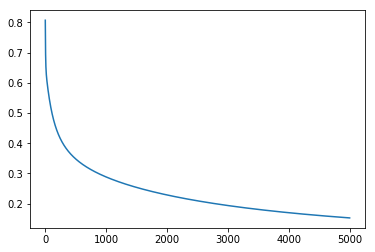

In [63]:
history = np.array(history, dtype = np.float)
plt.plot(history)
plt.show()

In [65]:
from sklearn.metrics import accuracy_score
predicted_values = []
for num in range(len(X_test_v)):
    predicted_values.append(model(X_test_v[num]))

In [66]:
score = 0
for num in range(len(predicted_values)):
    if np.argmax(Y_test[num]) == np.argmax(predicted_values[num].data.numpy()):
        score = score + 1
accuracy = float(score / len(predicted_values)) * 100
print ('Testing Accuracy Score is ' + str(accuracy))

Testing Accuracy Score is 100.0
